In [1]:
# ABD matrices calculator based on classical laminate theory
# Example 4.2 
import numpy as np

In [2]:
# 定义函数由单层板的工程常数计算单层板折减刚度矩阵Q
def transform_engineeringConstants(E1, E2, v12, G12):
    # 根据工程常数计算柔度矩阵的系数
    S11 = 1/E1;
    S12 = -v12/E1;
    S22 = 1/E2;
    S66 = 1/G12;
    # 初始化柔度矩阵
    S = np.zeros((3,3))
    # 将柔度矩阵的非零元素依次赋值；注意Python的编码从0开始。
    S[0][0] = S11;
    S[0][1] = S12;
    S[1][0] = S[0][1];
    S[1][1] = S22;
    S[2][2] = S66;
    # 矩阵运算求解折减刚度矩阵
    Q = np.linalg.inv(S)
    return Q

In [3]:
# 定义函数由单层板折减刚度矩阵Q和铺层角度，计算单层板在全局坐标系下的折减刚度矩阵Q_bar
def transform_Q(Q, theta):
    # 计算转换矩阵 T
    c = np.cos(theta*np.pi/180.0)
    s = np.sin(theta*np.pi/180.0)
    T = np.zeros((3,3))
    T[0][0] = c**2;
    T[0][1] = s**2;
    T[0][2] = 2.0*c*s;
    T[1][0] = s**2;
    T[1][1] = c**2;
    T[1][2] = -2.0*c*s;
    T[2][0] = -s*c;
    T[2][1] = s*c;
    T[2][2] = c**2-s**2;
    # 定义R矩阵
    R = np.zeros((3,3))
    R[0][0] = 1;
    R[1][1] = 1;
    R[2][2] = 2;
    # 计算全局折减刚度矩阵
    Q_bar = np.linalg.multi_dot([np.linalg.inv(T), Q, R, T, np.linalg.inv(R)])
    return Q_bar

In [4]:
def height(thickness):
    # thickness = np.array([5, 5, 5])
    ply_num = len(thickness)
    h_total = np.sum(thickness[0:ply_num]) # 层合板总厚度
    height = np.zeros(ply_num+1)
    #Create array storing the heights of k plies about the midplane
    for k in range(0, ply_num+1):
        height[k]= - h_total/2.0 + np.sum(thickness[0:k])
    return height

In [5]:
def ABD_matrices(Q, statck, thickness):
    A = np.zeros([3, 3])
    B = np.zeros([3, 3])
    D = np.zeros([3, 3])
    h = height(thickness)
    for i in range(3):
        for j in range(3):
            for k in range(len(h)-1):
                Q_bar = transform_Q(Q, statck[k])
                ply_kA = h[k+1] - h[k]
                ply_kB = (h[k+1]**2 - h[k]**2)/2
                ply_kD = (h[k+1]**3 - h[k]**3)/3
                A[i,j] = A[i,j] + ply_kA * Q_bar[i,j]
                B[i,j] = B[i,j] + ply_kB * Q_bar[i,j]
                D[i,j] = D[i,j] + ply_kD * Q_bar[i,j]
    return (A, B, D)

In [6]:
Q = transform_engineeringConstants(181.0*1.0E9, 10.3*1.0E9, 0.28, 7.17*1.0E9) # Example 2.6
thickness = np.array([5, 5, 5])
statck = np.array([0, 30, -45])
# 注意 ABD_matrices 中包含A, B, D共三个矩阵，每个矩阵都是3X3的
A = ABD_matrices(Q, statck, thickness)[0]
B = ABD_matrices(Q, statck, thickness)[1]
D = ABD_matrices(Q, statck, thickness)[2]
print("A = ", A) 
print("B = ", B)
print("D = ", D)

A =  [[ 1.73924086e+12  3.88386411e+11  5.66337309e+10]
 [ 3.88386411e+11  4.53253512e+11 -1.14063610e+11]
 [ 5.66337309e+10 -1.14063610e+11  4.52482544e+11]]
B =  [[-3.12883381e+12  9.85521554e+11 -1.07165613e+12]
 [ 9.85521554e+11  1.15779070e+12 -1.07165613e+12]
 [-1.07165613e+12 -1.07165613e+12  9.85521554e+11]]
D =  [[ 3.34320341e+13  6.46097724e+12 -5.24029369e+12]
 [ 6.46097724e+12  9.31977132e+12 -5.59591315e+12]
 [-5.24029369e+12 -5.59591315e+12  7.66277974e+12]]


In [7]:
# Example 4.3 starts here 

In [8]:
# 将3个3x3的A，B，D矩阵组装称为一个6x6的ABD矩阵
ABD_matrix = np.concatenate((np.concatenate((A, B), axis = 0), np.concatenate((B, D), axis = 0)), axis = 1)
print(ABD_matrix)

[[ 1.73924086e+12  3.88386411e+11  5.66337309e+10 -3.12883381e+12
   9.85521554e+11 -1.07165613e+12]
 [ 3.88386411e+11  4.53253512e+11 -1.14063610e+11  9.85521554e+11
   1.15779070e+12 -1.07165613e+12]
 [ 5.66337309e+10 -1.14063610e+11  4.52482544e+11 -1.07165613e+12
  -1.07165613e+12  9.85521554e+11]
 [-3.12883381e+12  9.85521554e+11 -1.07165613e+12  3.34320341e+13
   6.46097724e+12 -5.24029369e+12]
 [ 9.85521554e+11  1.15779070e+12 -1.07165613e+12  6.46097724e+12
   9.31977132e+12 -5.59591315e+12]
 [-1.07165613e+12 -1.07165613e+12  9.85521554e+11 -5.24029369e+12
  -5.59591315e+12  7.66277974e+12]]


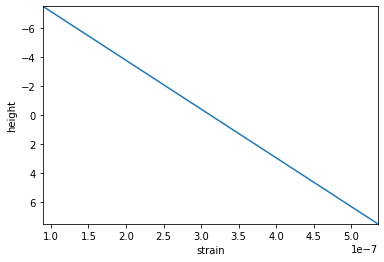

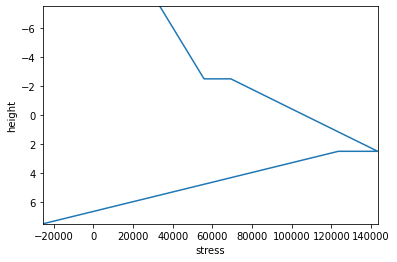

In [9]:
# 绘制层间应力、应变变化
import matplotlib.pyplot as plt
z = np.array([-7.5, -5, -2.5, -2.5, 0, 2.5, 2.5, 5, 7.5]) #位置坐标
epsilon_x = np.array([8.944e-8, 1.637e-7, 2.380e-7, 2.380e-7, 3.123e-7, 3.866e-7, 3.866e-7, 4.609e-7, 5.352e-7])
sigma_x = np.array([3.351e4, 4.464e4, 5.577e4, 6.930e4, 1.063e5, 1.434e5, 1.235e5, 4.903e4, -2.547e4])

plt.plot(epsilon_x, z)
plt.xlabel('strain')
plt.ylabel('height')
plt.axis([min(epsilon_x), max(epsilon_x), max(z), min(z)])
plt.show()


plt.plot(sigma_x, z)
plt.xlabel('stress')
plt.ylabel('height')
plt.axis([min(sigma_x), max(sigma_x), max(z), min(z)])
plt.show()